<a href="https://colab.research.google.com/github/MeenTers/AIprototype/blob/main/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install azure-data-tables

     |████████████████████████████████| 108 kB 23.6 MB/s 
     |████████████████████████████████| 85 kB 5.6 MB/s 
     |████████████████████████████████| 178 kB 63.0 MB/s 
     |████████████████████████████████| 41 kB 930 kB/s 


# Azure Table (CloudDB)

1. create DB on Azure Protal
2. Insert Data
3. Query Data

In [2]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [4]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=aiprototypemeenters;AccountKey=kTyZBos6m0iTthtPluCX2sz/OmEPbFXAIcq4LVk4cRhv3IGZeVDGP/Pk1PozIQx+BeeHTgeLjDt5TMpD9iVOOQ==;EndpointSuffix=core.windows.net')

# Insert Data

In [5]:
table_client = table_service.get_table_client(table_name="testdb")

## Insert by pre-create entity

In [6]:
task = TableEntity()
task[u'PartitionKey'] = u'part1'
task[u'RowKey'] = u'001'
task[u'name'] = u'kirito'
task[u'age'] = 15
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 46, 14, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A46%3A15.3697744Z\'"',
 'version': '2019-02-02'}

## Insert by dictionary

In [9]:
task = {u'PartitionKey': u'part1', u'RowKey': u'002',
        u'name': u'asuna', u'place': 'sao',u'age':16}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 2, 51, 9, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A51%3A09.6926465Z\'"',
 'version': '2019-02-02'}

## Query Data

### Query by partition key and row key(เลือกข้อมูล)

In [11]:
table_client = table_service.get_table_client(table_name="testdb")

In [10]:
task = table_client.get_entity('part1', '002')
print(task)

{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'asuna', 'place': 'sao', 'age': 16}


In [13]:
for i in range(10):
    task = {u'PartitionKey': u'partQ', u'RowKey': f'00{i+10}',
        u'name': u'character', u'place': 'sao',u'age':i}
    table_client.create_entity(entity=task)

### Query by logic(ดึงข้อมูลมาประมวลผลต่อ)

In [38]:
tasks = table_client.query_entities(query_filter="age lt 10")
print(tasks)

<iterator object azure.core.paging.ItemPaged at 0x7fa1215213d0>


In [40]:
for t in tasks:
    print(t)

{'PartitionKey': 'partQ', 'RowKey': '0011', 'name': 'character', 'place': 'sao', 'age': 1}
{'PartitionKey': 'partQ', 'RowKey': '0012', 'name': 'character', 'place': 'sao', 'age': 2}
{'PartitionKey': 'partQ', 'RowKey': '0013', 'name': 'character', 'place': 'sao', 'age': 3}
{'PartitionKey': 'partQ', 'RowKey': '0014', 'name': 'character', 'place': 'sao', 'age': 4}
{'PartitionKey': 'partQ', 'RowKey': '0015', 'name': 'character', 'place': 'sao', 'age': 5}
{'PartitionKey': 'partQ', 'RowKey': '0016', 'name': 'character', 'place': 'sao', 'age': 6}
{'PartitionKey': 'partQ', 'RowKey': '0017', 'name': 'character', 'place': 'sao', 'age': 7}
{'PartitionKey': 'partQ', 'RowKey': '0018', 'name': 'character', 'place': 'sao', 'age': 8}
{'PartitionKey': 'partQ', 'RowKey': '0019', 'name': 'character', 'place': 'sao', 'age': 9}


# Cloud AI

In [29]:
!pip install azure-cognitiveservices-vision-computervision

In [33]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials


credentials = CognitiveServicesCredentials('42d975d0aeb94b0a87c22608fffcee88')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [35]:
url = "https://aiprototypemeenters.blob.core.windows.net/pics/salah.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 41, 'gender': <Gender.male: 'Male'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7fa11f8b9350>}


In [42]:
print(tag.face_rectangle.height,tag.face_rectangle.width,tag.face_rectangle.top,tag.face_rectangle.left)

147 147 179 506


In [43]:
import cv2

In [44]:
from matplotlib import pyplot as plt

In [45]:
img = cv2.imread('/content/salah.jpg')

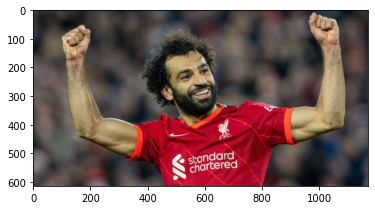

In [47]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [51]:
img2 = cv2.rectangle(img,(tag.face_rectangle.left,tag.face_rectangle.top),
                   (tag.face_rectangle.left+tag.face_rectangle.width,tag.face_rectangle.top+tag.face_rectangle.height),(0,0,255),5)

41
Gender.male


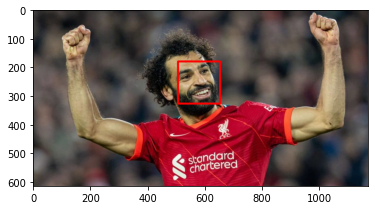

In [52]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)